### Task1

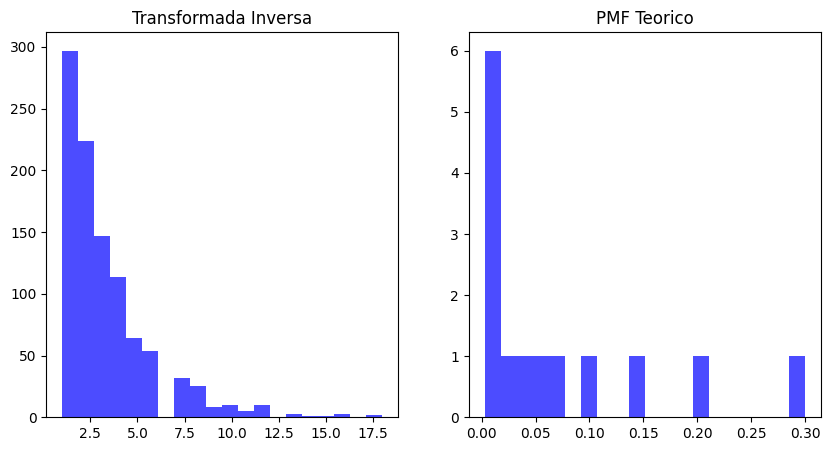

In [45]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt

p = 0.3

# Transformada inversa
U = np.random.uniform(0, 1, size=1000)
sample = [int(np.ceil(np.log(1 - u) / np.log(1 - p))) for u in U]

# PMF Teorico
values = np.arange(1, 15)
pmf_teorico = geom.pmf(values, p)

# Trazo de histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(sample, bins=20, alpha=0.7, color='blue')
ax1.set_title('Transformada Inversa')

ax2.hist(pmf_teorico, bins=20, alpha=0.7, color='blue')
ax2.set_title('PMF Teorico')
plt.show()

### Task2

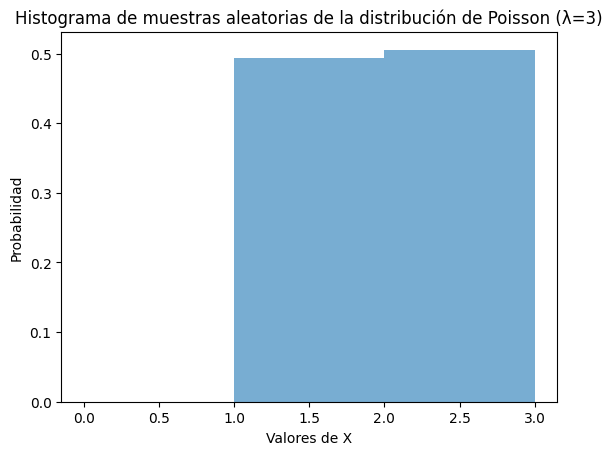

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambda_ = 3

geom_samples = np.random.geometric(1/lambda_, size=1000)
poisson_samples = geom_samples[geom_samples <= lambda_]

# Trazar el histograma de las muestras generadas
plt.hist(poisson_samples, bins=np.arange(0, max(poisson_samples) + 1), density=True, alpha=0.6)
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.title('Histograma de muestras aleatorias de la distribución de Poisson (λ=3)')
plt.show()
